<span style='background:#DCEDC8; font-size:30px; display:block; border-left:40px solid #C5E1A5; padding-left:40px;'>
<b>
    Download multiple meteoscreening variables
</b>
</span>

**notebook version**: `2` (2 Mar 2024)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Specify what you want to download in the `User settings`
- Data are stored to a `.csv` file in this folder
- The end of the notebook also shows how to format downloaded data for upload to `FLUXNET` for data sharing

# **User settings** (please adjust)

## Site

In [1]:
SITE='ch-fru'

## Variables to download
- Specify variables as shown in the database

In [2]:
# Variable names
# Variables are called FIELDS in the database; InfluxDB stores variable names as '_field'
FIELDS = [
    'SWC_GF1_0.05_1',
    'SWC_GF1_0.15_1',
    'SWC_GF1_0.25_1',
    'SWC_GF1_0.4_1',
    'SWC_GF1_0.95_1',
    'TS_GF1_0.01_1',
    'TS_GF1_0.04_1',
    'TS_GF1_0.07_1',
    'TS_GF1_0.15_1',
    'TS_GF1_0.1_2',
    'TS_GF1_0.25_1',
    'TS_GF1_0.2_2',
    'TS_GF1_0.3_2',
    'TS_GF1_0.4_1',
    'TS_GF1_0.5_2',
    'TS_GF1_0.95_1',
    'TS_GF1_1_2',
    'PREC_TOT_GF1_1_1',
    'PREC_TOT_T1_0.5_1',
    'G_GF1_0.06_1',
    'G_GF1_0.06_2'
]  

# Measurement names
# used to group similar variable together, e.g., 'TA' contains all air temperature variables
MEASUREMENTS = ['SWC', 'TS', 'PREC', 'G']

## Time range to download
- `START`: Download data starting with this date (the start date itself IS included)
- `STOP`: Download data before this date (the stop date itself IS NOT included)

In [3]:
START = '2021-01-01 00:00:01'  
STOP = '2024-01-01 00:00:01'

## Output file
- Name of the output file that will contain the downloaded data

In [4]:
OUTFILE = f"CH-FRU_SWC_TS_PREC_G_2021-2023.csv"

# **Auto-settings**

## Data settings

In [5]:
DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
DATA_VERSION = 'meteoscreening'
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30T'  # 30MIN time resolution

## Imports

In [6]:
from datetime import datetime
import importlib.metadata
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme('notebook')
from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.times.times import DetectFrequency
import warnings
from influxdb_client.client.warnings import MissingPivotFunction
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"This page was last modified on: {dt_string}")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")
version_dbc = importlib.metadata.version("dbc_influxdb")
print(f"dbc-influxdb version: v{version_dbc}")

Loading BokehJS ...

This page was last modified on: 2024-03-02 21:06:08
diive version: v0.70.1
dbc-influxdb version: v0.11.0


## Connect to database

In [7]:
dbc = dbcInflux(dirconf=DIRCONF)

Reading configuration files was successful.
Connection to database works.


# **Download**

In [8]:
%%time
data_simple, data_detailed, assigned_measurements = dbc.download(bucket=f'{SITE}_processing',
                                                                 measurements=MEASUREMENTS,
                                                                 fields=FIELDS,
                                                                 start=START,
                                                                 stop=STOP,
                                                                 timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
                                                                 data_version=DATA_VERSION)

    variables ['SWC_GF1_0.05_1', 'SWC_GF1_0.15_1', 'SWC_GF1_0.25_1', 'SWC_GF1_0.4_1', 'SWC_GF1_0.95_1', 'TS_GF1_0.01_1', 'TS_GF1_0.04_1', 'TS_GF1_0.07_1', 'TS_GF1_0.15_1', 'TS_GF1_0.1_2', 'TS_GF1_0.25_1', 'TS_GF1_0.2_2', 'TS_GF1_0.3_2', 'TS_GF1_0.4_1', 'TS_GF1_0.5_2', 'TS_GF1_0.95_1', 'TS_GF1_1_2', 'PREC_TOT_GF1_1_1', 'PREC_TOT_T1_0.5_1', 'G_GF1_0.06_1', 'G_GF1_0.06_2'] from measurements ['SWC', 'TS', 'PREC', 'G']
    between 2021-01-01 00:00:01 and 2024-01-01 00:00:01
    in data version meteoscreening
    with timezone offset to UTC of 1
Downloaded data for 21 variables:
    SWC_GF1_0.05_1   (51740 records)     first date: 2021-01-01 00:30:00    last date: 2024-01-01 00:00:00
    SWC_GF1_0.15_1   (51740 records)     first date: 2021-01-01 00:30:00    last date: 2024-01-01 00:00:00
    SWC_GF1_0.25_1   (51740 records)     first date: 2021-01-01 00:30:00    last date: 2024-01-01 00:00:00
    SWC_GF1_0.4_1   (51648 records)     first date: 2021-01-01 00:30:00    last date: 2024-01-01 00

In [9]:
data_simple

,G_GF1_0.06_1,G_GF1_0.06_2,PREC_TOT_GF1_1_1,PREC_TOT_T1_0.5_1,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.25_1,SWC_GF1_0.4_1,SWC_GF1_0.95_1,TS_GF1_0.01_1,TS_GF1_0.04_1,TS_GF1_0.07_1,TS_GF1_0.15_1,TS_GF1_0.1_2,TS_GF1_0.25_1,TS_GF1_0.2_2,TS_GF1_0.3_2,TS_GF1_0.4_1,TS_GF1_0.5_2,TS_GF1_0.95_1,TS_GF1_1_2
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,-6.887082,-8.630404,NaN,0.0,57.757180,48.892675,52.328157,51.620279,50.966991,1.617724,1.598698,1.628083,1.750629,1.652278,2.579931,2.206667,2.727833,3.158559,3.491056,4.505392,5.140111
2021-01-01 01:00:00,-6.881727,-8.593153,NaN,0.0,57.748287,48.893477,52.325673,51.620014,50.937244,1.616175,1.595996,1.622893,1.747853,1.651207,2.575691,2.203678,2.724253,3.152399,3.490172,4.501024,5.142586
2021-01-01 01:30:00,-6.860665,-8.571210,NaN,0.0,57.746917,48.891679,52.325026,51.620346,50.936373,1.613661,1.594271,1.622331,1.747667,1.650988,2.573988,2.200926,2.719136,3.154748,3.489630,4.498686,5.148580
2021-01-01 02:00:00,-6.850413,-8.579524,NaN,0.0,57.744498,48.896227,52.322758,51.617845,50.932446,1.612042,1.592655,1.621771,1.745108,1.650889,2.572263,2.199278,2.726000,3.152439,3.490111,4.497496,5.136444
2021-01-01 02:30:00,-6.840737,-8.568706,NaN,0.0,57.743355,48.893252,52.326046,51.616538,50.930636,1.611251,1.591702,1.619655,1.743779,1.651333,2.570895,2.196167,2.719111,3.150649,3.490333,4.494951,5.141333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,-11.329137,-10.276702,0.0,NaN,50.928250,49.419856,50.885298,51.602317,52.795291,2.704347,2.929684,3.223008,3.521794,2.769150,4.050176,3.373532,3.766896,4.330364,4.659507,5.206067,5.482050
2023-12-31 22:30:00,-10.846899,-9.953404,0.0,NaN,50.677806,49.331384,50.713914,51.509070,52.827020,2.691518,2.913480,3.208225,3.511406,2.744954,4.041168,3.355100,3.758954,4.332319,4.659507,5.208007,5.472579
2023-12-31 23:00:00,-10.647751,-9.769562,0.0,NaN,50.500420,49.247422,50.547752,51.431652,52.828643,2.674907,2.896907,3.192060,3.496167,2.730569,4.031926,3.341942,3.753000,4.326444,4.662185,5.207122,5.477991


### Check time resolution of downloaded data

In [10]:
_checkfreq = DetectFrequency(index=data_simple.index, verbose=True).get()
if _checkfreq == '30T':
    print(f">>> TEST PASSED - The downloaded dataset has a time resolution of {_checkfreq}. <<<")
else:
    print(f"{'#' * 20}(!)TEST FAILED - The downloaded dataset does not have the expected time resolution of {_checkfreq}.{'#' * 20}")

Detecting time resolution from timestamp TIMESTAMP_END ... OK
   Detected 30T time resolution with HIGH confidence.
   Resolution detected from most frequent timestep (timedelta):
       from full data = None / -failed- (not used)
       from timedelta = 30T / >90% occurrence (OK)
       from progressive = 30T / data 1000+1000 (not used)

>>> TEST PASSED - The downloaded dataset has a time resolution of 30T. <<<


## Time series plot

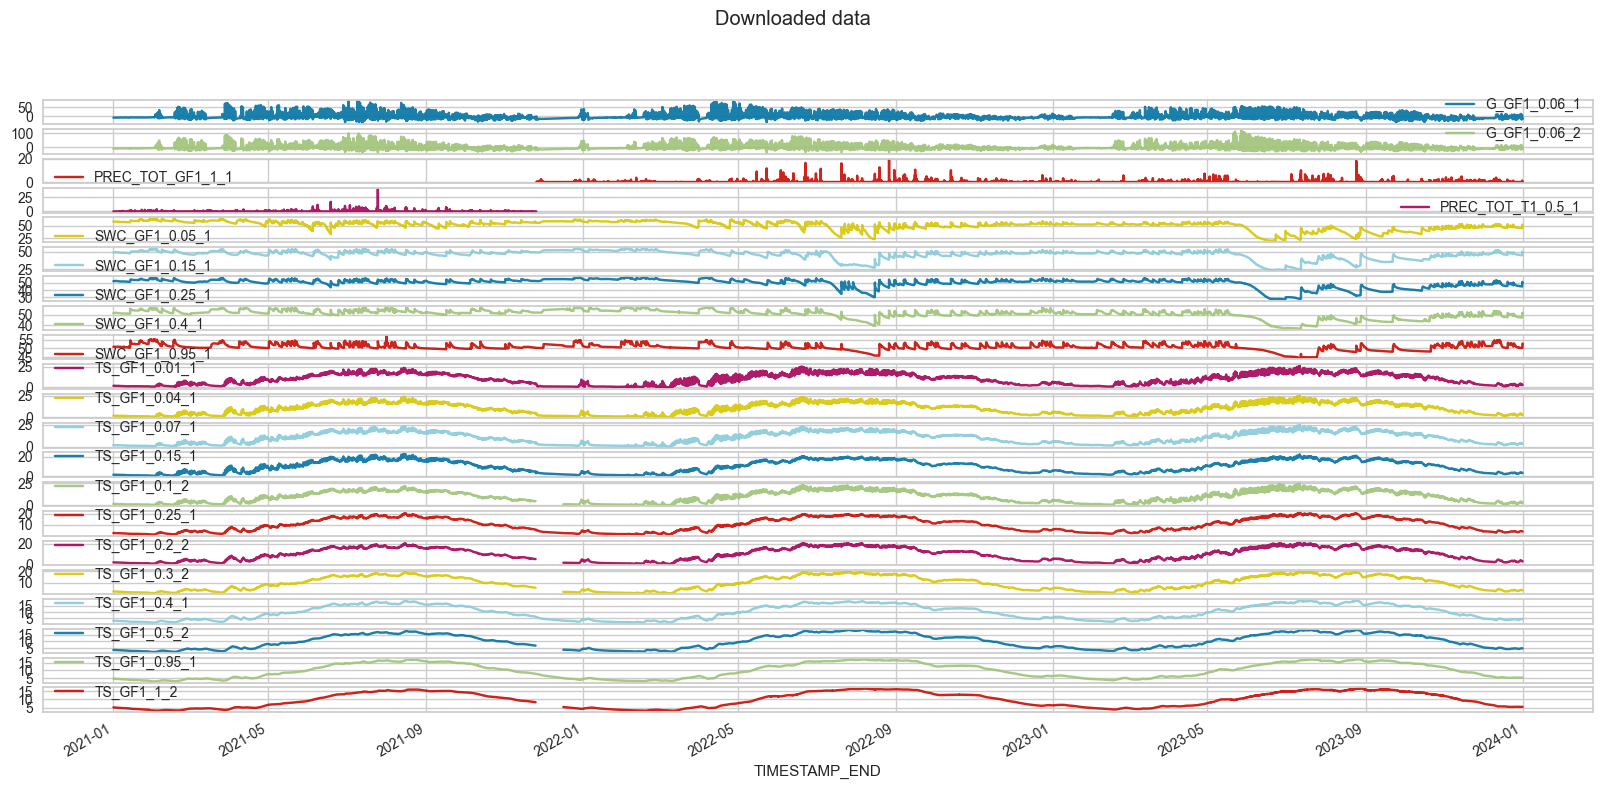

In [11]:
data_simple.plot(subplots=True, figsize=(20, 9), title="Downloaded data", alpha=.9);

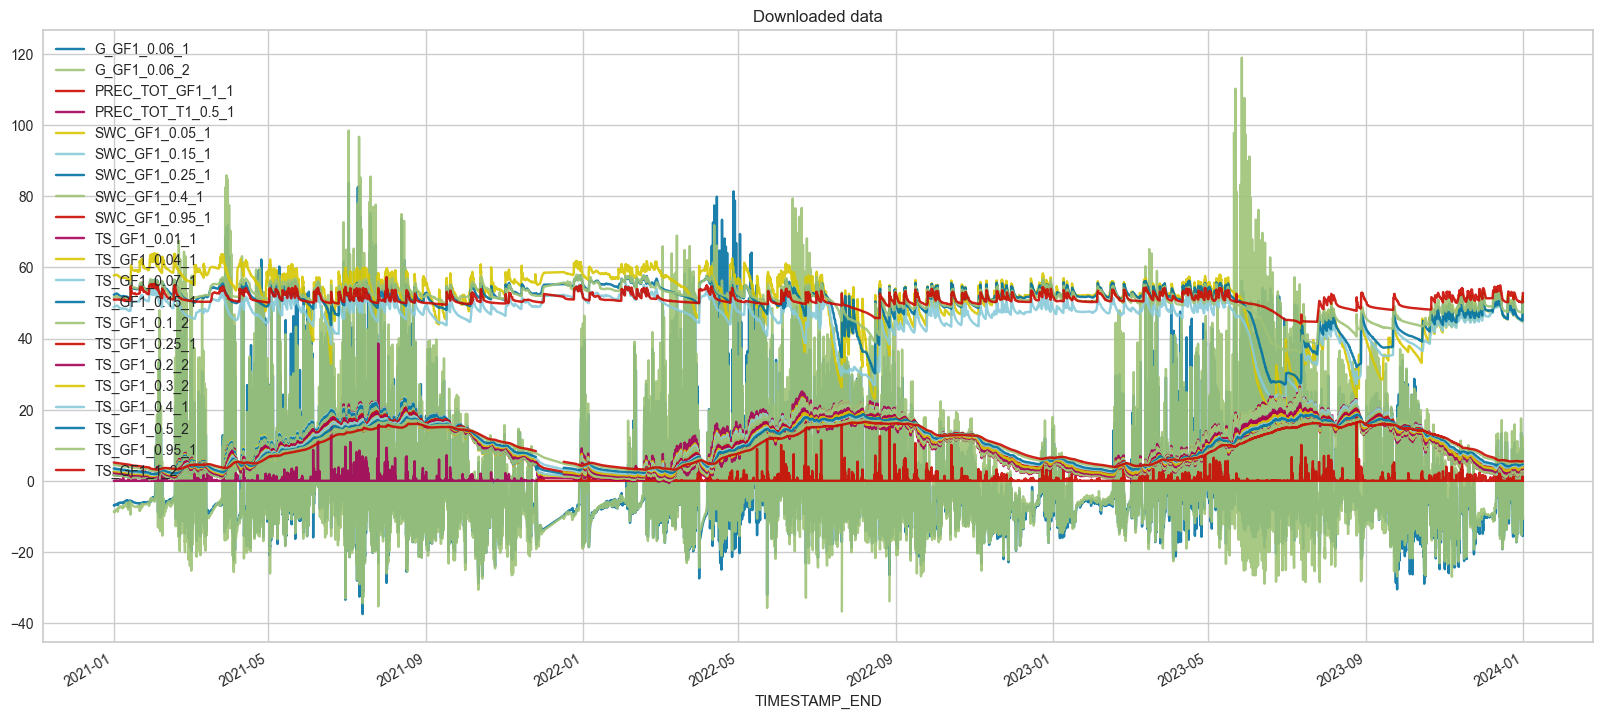

In [12]:
data_simple.plot(subplots=False, figsize=(20, 9), title="Downloaded data", alpha=.9);

## Heatmap

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_datetime.py:112: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=self.figsize)


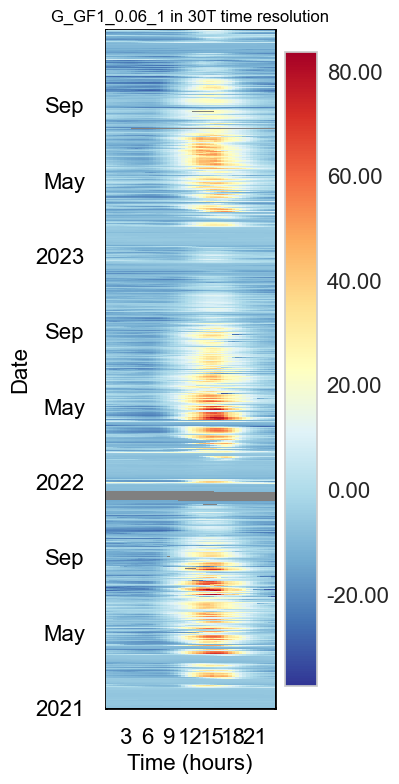

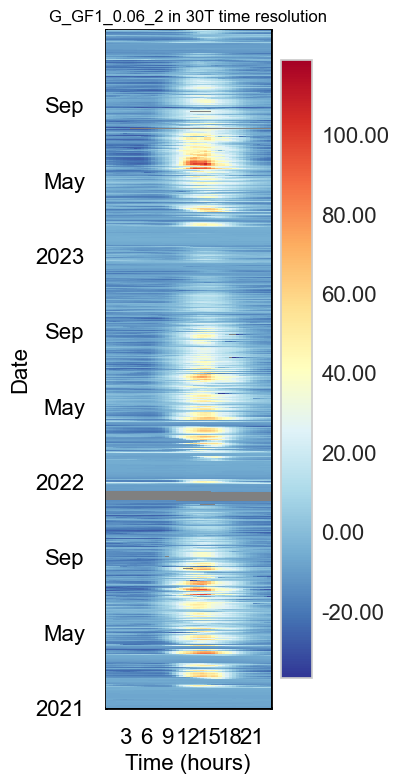

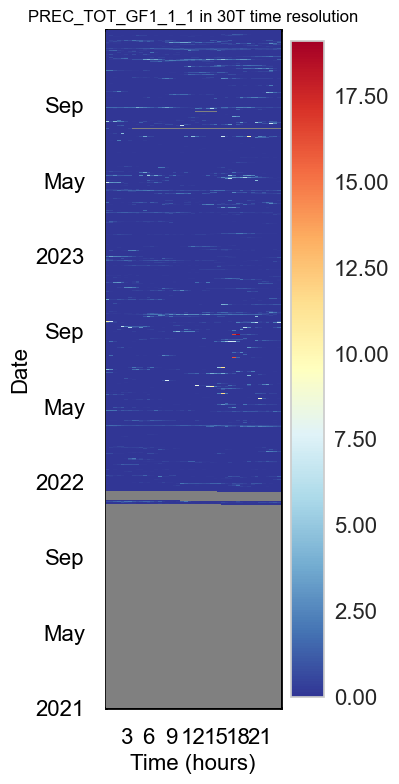

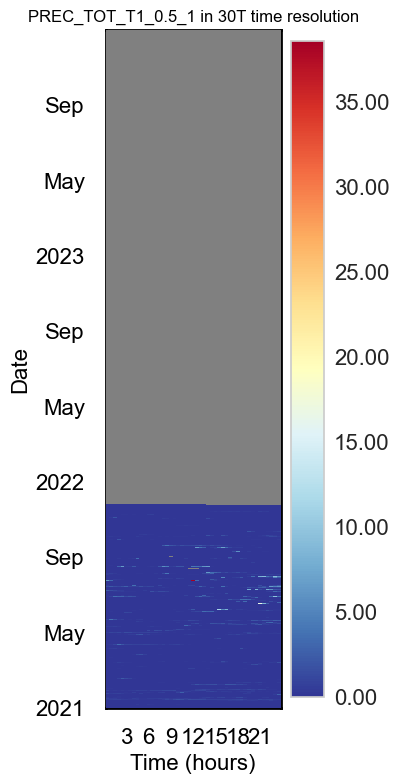

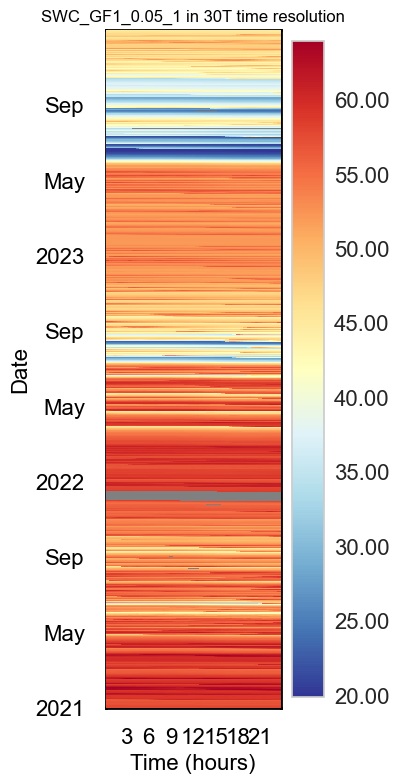

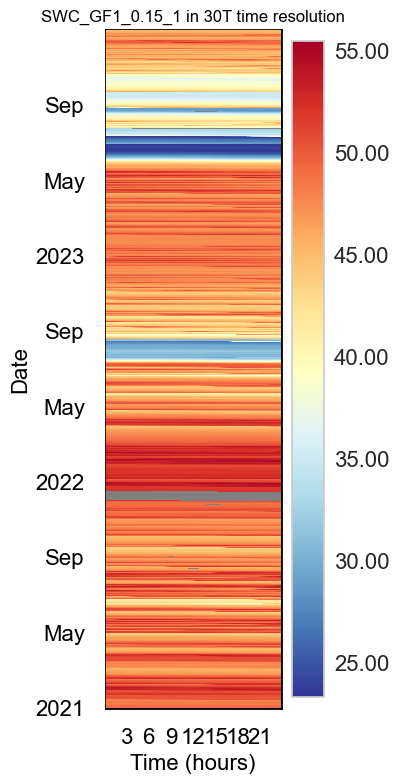

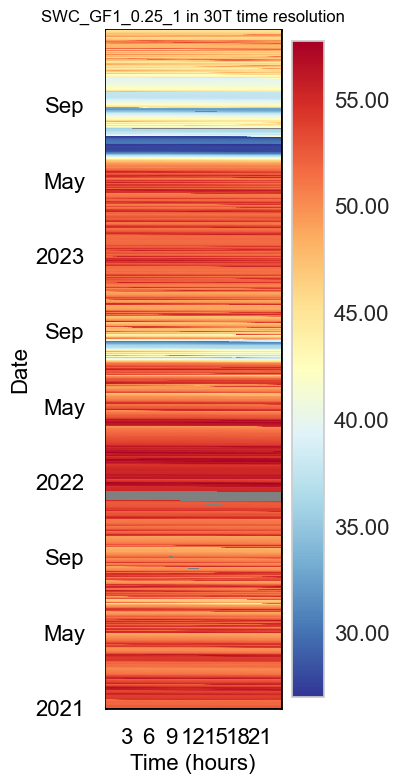

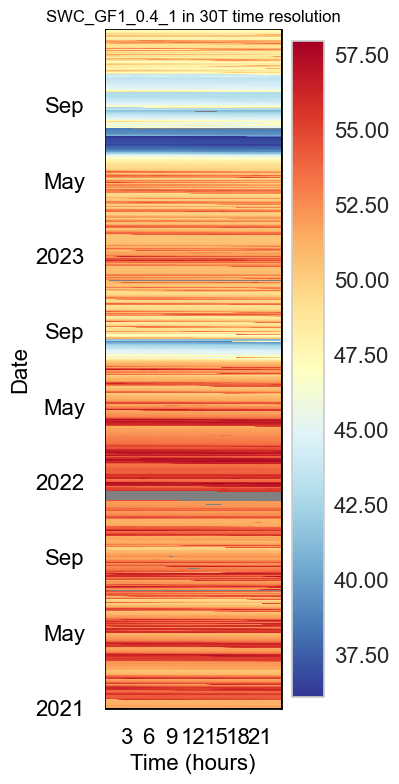

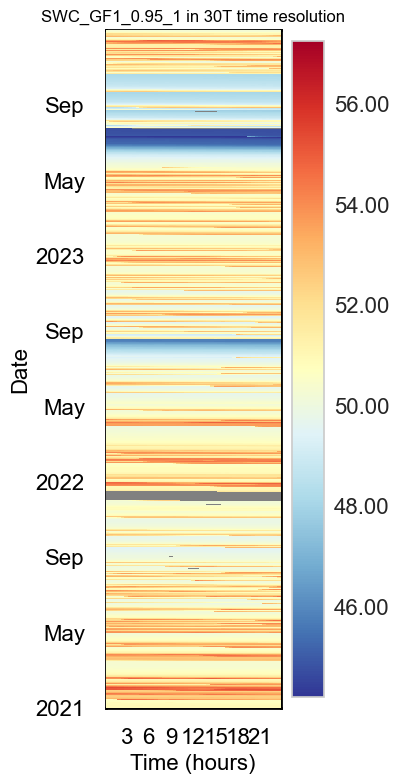

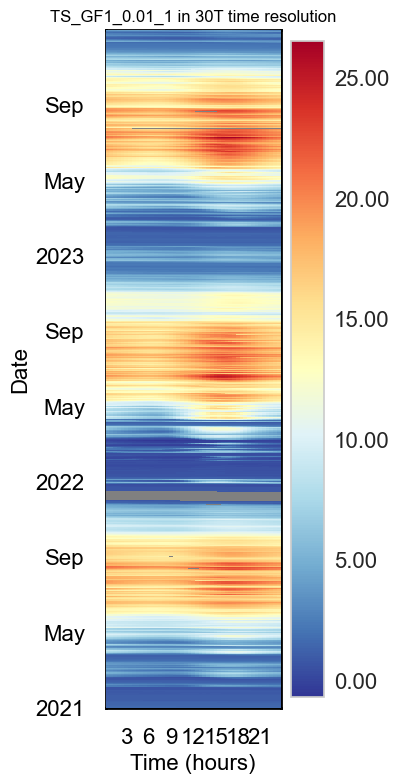

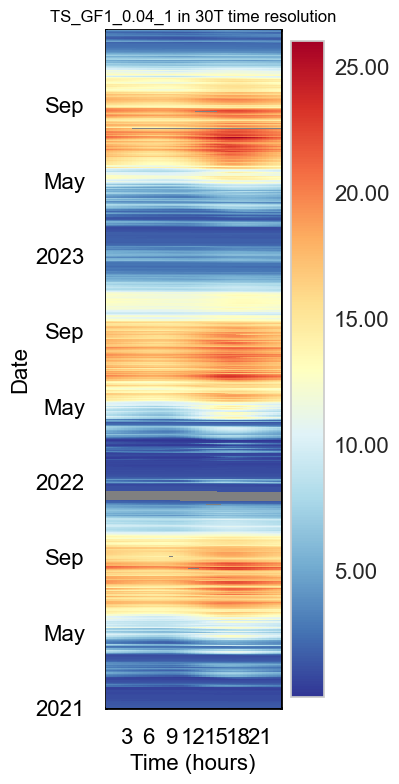

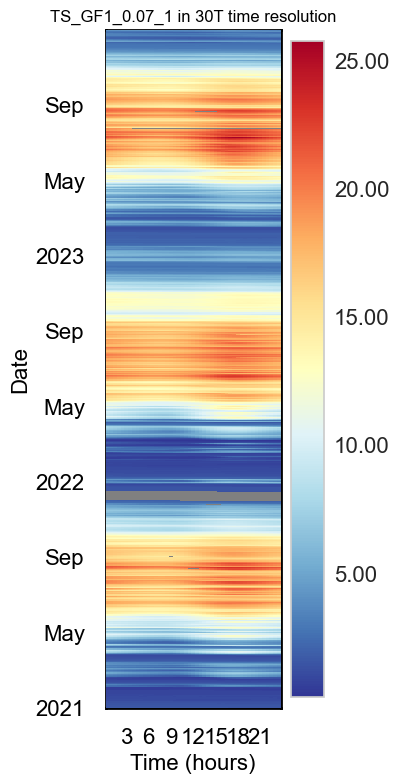

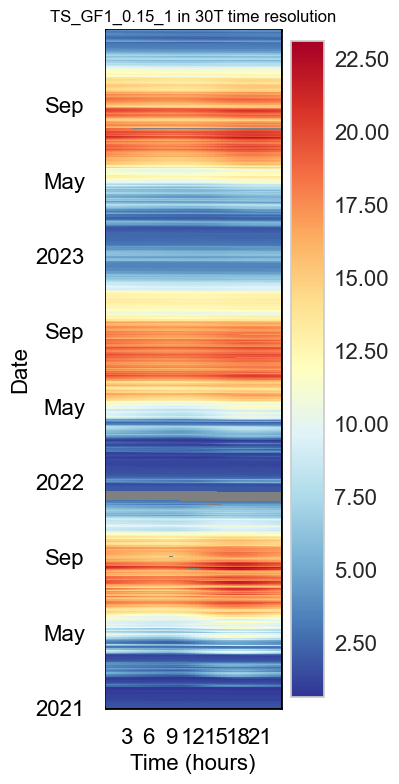

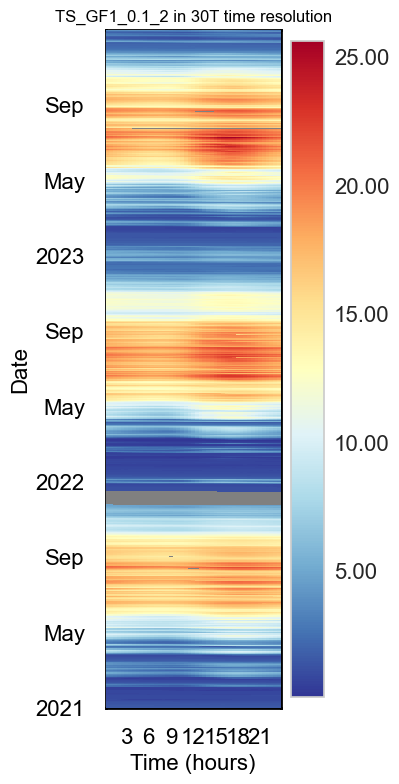

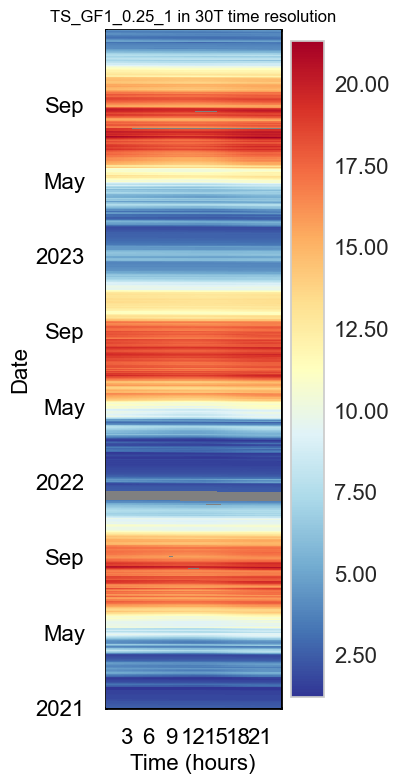

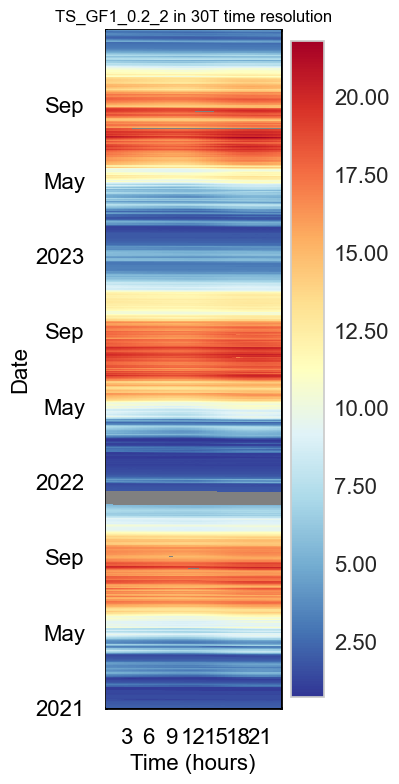

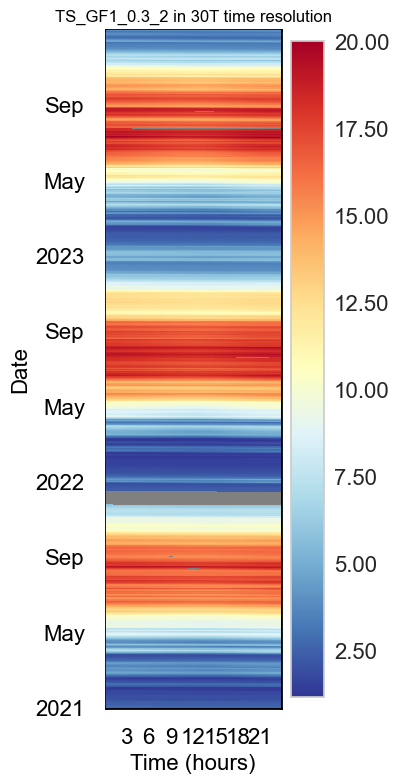

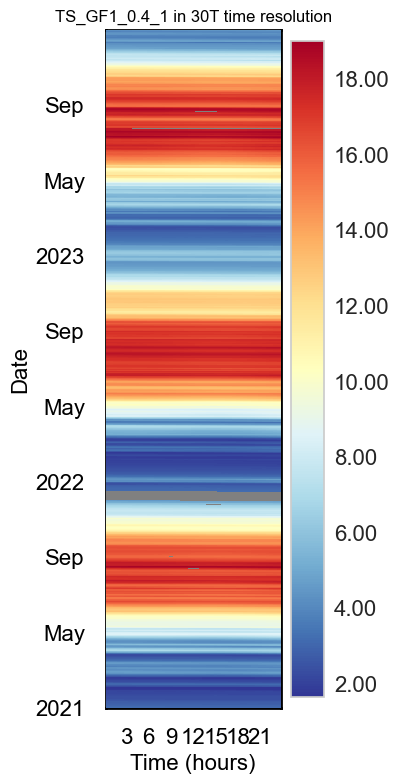

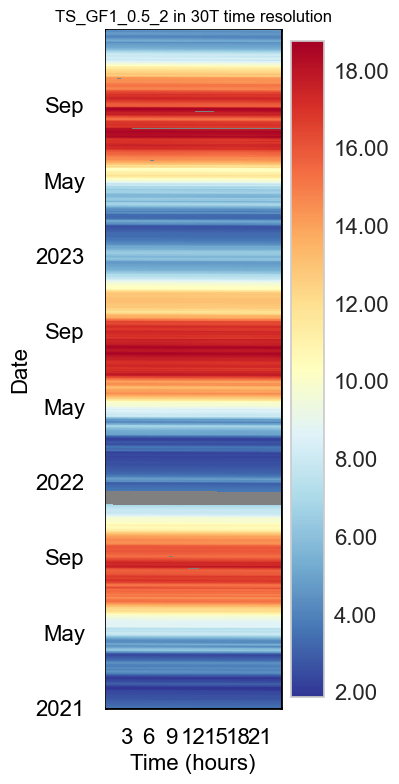

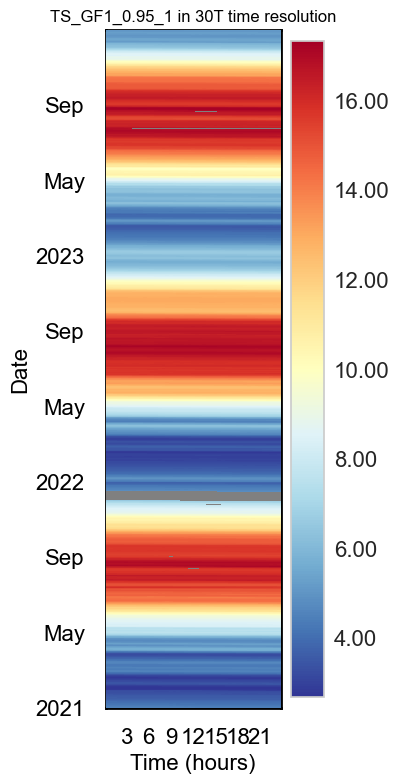

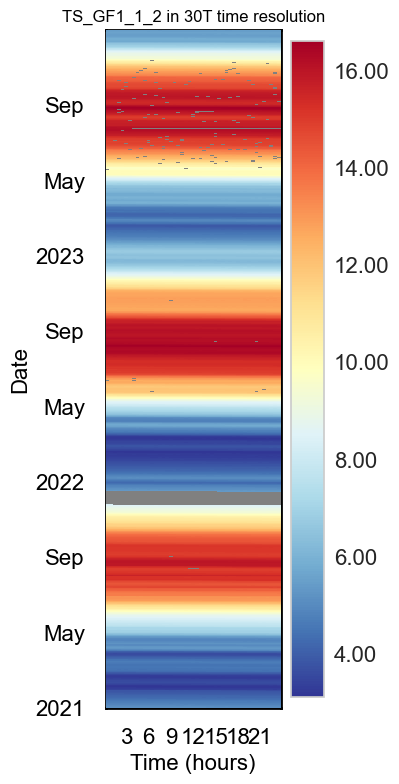

In [13]:
for col in data_simple.columns:    
    series = data_simple[col].asfreq('30T')
    HeatmapDateTime(series, figsize=(4,8)).show()    

## Stats

In [14]:
data_simple.describe()

,G_GF1_0.06_1,G_GF1_0.06_2,PREC_TOT_GF1_1_1,PREC_TOT_T1_0.5_1,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.25_1,SWC_GF1_0.4_1,SWC_GF1_0.95_1,TS_GF1_0.01_1,TS_GF1_0.04_1,TS_GF1_0.07_1,TS_GF1_0.15_1,TS_GF1_0.1_2,TS_GF1_0.25_1,TS_GF1_0.2_2,TS_GF1_0.3_2,TS_GF1_0.4_1,TS_GF1_0.5_2,TS_GF1_0.95_1,TS_GF1_1_2
count,51738.000000,51737.000000,35973.000000,15767.000000,51740.000000,51740.000000,51740.000000,51648.000000,51740.000000,51740.000000,51740.000000,51740.000000,51740.000000,51437.000000,51740.000000,51437.000000,51428.000000,51740.000000,51431.000000,51740.000000,51198.000000
mean,-1.535181,-0.831084,0.091380,0.106590,50.455050,45.817685,49.781635,50.813843,50.821891,9.624298,9.749288,10.033930,9.952469,9.690325,10.167331,9.727383,9.758661,9.946059,10.019882,9.921638,9.747481
std,13.814109,15.844180,0.478421,0.606911,8.673377,6.242662,5.980702,4.148283,1.810470,6.529760,6.440566,6.538663,6.172874,6.438304,6.004947,6.081567,5.814978,5.543284,5.400979,4.849829,4.531117
min,-37.473936,-36.741971,0.000000,0.000000,19.928273,23.348222,27.026562,36.087643,44.204162,-0.663574,0.039168,0.193505,0.641624,0.129228,1.234794,0.735325,1.182691,1.657271,1.890222,2.701250,3.111858
25%,-9.652409,-10.035899,0.000000,0.000000,46.880091,44.535619,48.540216,49.525517,50.076195,3.330097,3.473868,3.671049,3.975499,3.447330,4.263507,3.796010,4.029690,4.486269,4.707666,5.090312,5.133721
50%,-5.862736,-5.805172,0.000000,0.000000,52.605362,47.469028,51.618582,51.664086,50.675546,9.386278,9.565846,9.854541,9.755876,9.489944,9.837084,9.475166,9.480000,9.745010,9.773851,9.745797,9.651222
75%,2.721158,3.897949,0.000000,0.000000,56.485250,49.618610,53.591712,53.433968,51.945271,15.701915,15.890514,16.382223,16.063469,15.826337,16.282353,15.818033,15.633029,15.712571,15.377028,14.864519,14.448073
max,83.782477,118.972087,19.100000,38.600000,63.955414,55.502728,57.736074,57.967153,57.261312,26.524163,26.000210,25.774217,23.120488,25.621843,21.307423,21.791097,20.028650,19.007369,18.750857,17.320692,16.617770


## Save to file

In [15]:
data_simple.to_csv(OUTFILE)

</br>

# **Prepare data for FLUXNET upload**

## Working data

In [17]:
wdf = data_simple.copy()

## Merge two precipitation variables into one time series

In [18]:
wdf['PREC_TOT_T1+GF1_0.5+1_1'] = wdf['PREC_TOT_GF1_1_1'].combine_first(wdf['PREC_TOT_T1_0.5_1'])

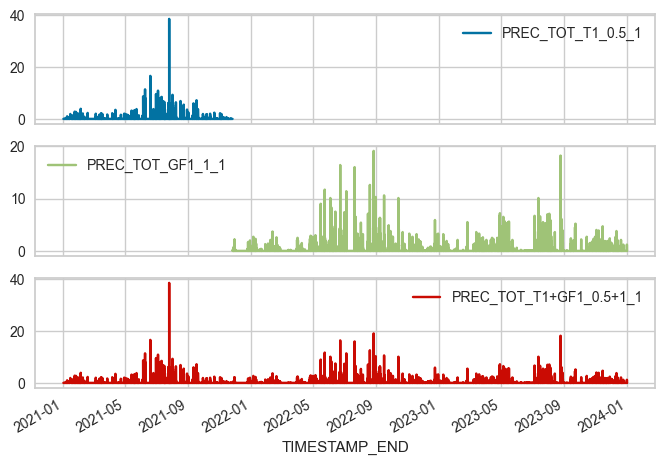

In [19]:
wdf[['PREC_TOT_T1_0.5_1', 'PREC_TOT_GF1_1_1', 'PREC_TOT_T1+GF1_0.5+1_1']].plot(subplots=True);

## Remove unneeded precipitation columns from data

In [20]:
wdf = wdf.drop(['PREC_TOT_T1_0.5_1', 'PREC_TOT_GF1_1_1'], axis=1)
wdf

,G_GF1_0.06_1,G_GF1_0.06_2,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.25_1,SWC_GF1_0.4_1,SWC_GF1_0.95_1,TS_GF1_0.01_1,TS_GF1_0.04_1,TS_GF1_0.07_1,TS_GF1_0.15_1,TS_GF1_0.1_2,TS_GF1_0.25_1,TS_GF1_0.2_2,TS_GF1_0.3_2,TS_GF1_0.4_1,TS_GF1_0.5_2,TS_GF1_0.95_1,TS_GF1_1_2,PREC_TOT_T1+GF1_0.5+1_1
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,-6.887082,-8.630404,57.757180,48.892675,52.328157,51.620279,50.966991,1.617724,1.598698,1.628083,1.750629,1.652278,2.579931,2.206667,2.727833,3.158559,3.491056,4.505392,5.140111,0.0
2021-01-01 01:00:00,-6.881727,-8.593153,57.748287,48.893477,52.325673,51.620014,50.937244,1.616175,1.595996,1.622893,1.747853,1.651207,2.575691,2.203678,2.724253,3.152399,3.490172,4.501024,5.142586,0.0
2021-01-01 01:30:00,-6.860665,-8.571210,57.746917,48.891679,52.325026,51.620346,50.936373,1.613661,1.594271,1.622331,1.747667,1.650988,2.573988,2.200926,2.719136,3.154748,3.489630,4.498686,5.148580,0.0
2021-01-01 02:00:00,-6.850413,-8.579524,57.744498,48.896227,52.322758,51.617845,50.932446,1.612042,1.592655,1.621771,1.745108,1.650889,2.572263,2.199278,2.726000,3.152439,3.490111,4.497496,5.136444,0.0
2021-01-01 02:30:00,-6.840737,-8.568706,57.743355,48.893252,52.326046,51.616538,50.930636,1.611251,1.591702,1.619655,1.743779,1.651333,2.570895,2.196167,2.719111,3.150649,3.490333,4.494951,5.141333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,-11.329137,-10.276702,50.928250,49.419856,50.885298,51.602317,52.795291,2.704347,2.929684,3.223008,3.521794,2.769150,4.050176,3.373532,3.766896,4.330364,4.659507,5.206067,5.482050,0.0
2023-12-31 22:30:00,-10.846899,-9.953404,50.677806,49.331384,50.713914,51.509070,52.827020,2.691518,2.913480,3.208225,3.511406,2.744954,4.041168,3.355100,3.758954,4.332319,4.659507,5.208007,5.472579,0.0
2023-12-31 23:00:00,-10.647751,-9.769562,50.500420,49.247422,50.547752,51.431652,52.828643,2.674907,2.896907,3.192060,3.496167,2.730569,4.031926,3.341942,3.753000,4.326444,4.662185,5.207122,5.477991,0.0


## Set all missing values to -9999 as required by FLUXNET

In [21]:
wdf = wdf.fillna(-9999)

In [22]:
wdf.describe()

,G_GF1_0.06_1,G_GF1_0.06_2,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.25_1,SWC_GF1_0.4_1,SWC_GF1_0.95_1,TS_GF1_0.01_1,TS_GF1_0.04_1,TS_GF1_0.07_1,TS_GF1_0.15_1,TS_GF1_0.1_2,TS_GF1_0.25_1,TS_GF1_0.2_2,TS_GF1_0.3_2,TS_GF1_0.4_1,TS_GF1_0.5_2,TS_GF1_0.95_1,TS_GF1_1_2,PREC_TOT_T1+GF1_0.5+1_1
count,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000
mean,-2.114845,-1.604023,50.260824,45.623549,49.587422,32.750166,50.627658,9.430861,9.555849,9.840485,9.759026,-49.114914,9.973883,-49.078073,-50.787936,9.752616,-49.947961,9.728195,-95.290108,-0.097238
std,77.367725,89.322745,45.023249,44.598610,44.579967,425.712309,44.218629,44.482303,44.469841,44.485392,44.432746,764.956133,44.410665,764.956063,776.128620,44.349636,772.440106,44.268203,1019.952072,43.961634
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-9.654108,-10.037695,46.879499,44.535314,48.539844,49.493597,50.075961,3.329484,3.473373,3.670802,3.975238,3.363889,4.263102,3.733825,3.985487,4.486253,4.663522,5.090125,5.063444,0.000000
50%,-5.863105,-5.806311,52.605128,47.469026,51.618499,51.657303,50.675525,9.386257,9.565835,9.854300,9.755481,9.414222,9.837048,9.412444,9.404778,9.744571,9.694167,9.744763,9.448553,0.000000
75%,2.720862,3.896946,56.485234,49.618476,53.591690,53.430564,51.945203,15.701842,15.890424,16.382103,16.063435,15.803207,16.282197,15.789190,15.610003,15.712556,15.360000,14.864453,14.424117,0.000000
max,83.782477,118.972087,63.955414,55.502728,57.736074,57.967153,57.261312,26.524163,26.000210,25.774217,23.120488,25.621843,21.307423,21.791097,20.028650,19.007369,18.750857,17.320692,16.617770,38.600000


## Rename variables to FLUXNET-compliant variable names
- Using the same names as for previous upload
- For `PREC` we have two time series which were merged together

In [23]:
renaming_dict = {
    'SWC_GF1_0.05_1': 'SWC_1_1_1',
    'SWC_GF1_0.15_1': 'SWC_1_2_1',
    'SWC_GF1_0.25_1': 'SWC_1_3_1',
    'SWC_GF1_0.4_1': 'SWC_1_4_1',
    'SWC_GF1_0.95_1': 'SWC_1_5_1',
    'TS_GF1_0.01_1': 'TS_1_1_1',
    'TS_GF1_0.04_1': 'TS_1_2_1',
    'TS_GF1_0.07_1': 'TS_1_3_1',
    'TS_GF1_0.15_1': 'TS_1_5_1',
    'TS_GF1_0.1_2': 'TS_1_4_2',
    'TS_GF1_0.25_1': 'TS_1_7_1',
    'TS_GF1_0.2_2': 'TS_1_6_1',
    'TS_GF1_0.3_2': 'TS_1_8_1',
    'TS_GF1_0.4_1': 'TS_1_9_1',
    'TS_GF1_0.5_2': 'TS_1_10_1',
    'TS_GF1_0.95_1': 'TS_1_11_1',
    'TS_GF1_1_2': 'TS_1_12_1',
    'PREC_TOT_T1+GF1_0.5+1_1': '`P_1_1_1',
    'G_GF1_0.06_1': 'G_1_1_1',
    'G_GF1_0.06_2': 'G_1_1_2',
}

In [24]:
wdf = wdf.rename(columns=renaming_dict)

In [25]:
wdf.describe()

,G_1_1_1,G_1_1_2,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_5_1,TS_1_4_2,TS_1_7_1,TS_1_6_1,TS_1_8_1,TS_1_9_1,TS_1_10_1,TS_1_11_1,TS_1_12_1,`P_1_1_1
count,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000,51741.000000
mean,-2.114845,-1.604023,50.260824,45.623549,49.587422,32.750166,50.627658,9.430861,9.555849,9.840485,9.759026,-49.114914,9.973883,-49.078073,-50.787936,9.752616,-49.947961,9.728195,-95.290108,-0.097238
std,77.367725,89.322745,45.023249,44.598610,44.579967,425.712309,44.218629,44.482303,44.469841,44.485392,44.432746,764.956133,44.410665,764.956063,776.128620,44.349636,772.440106,44.268203,1019.952072,43.961634
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-9.654108,-10.037695,46.879499,44.535314,48.539844,49.493597,50.075961,3.329484,3.473373,3.670802,3.975238,3.363889,4.263102,3.733825,3.985487,4.486253,4.663522,5.090125,5.063444,0.000000
50%,-5.863105,-5.806311,52.605128,47.469026,51.618499,51.657303,50.675525,9.386257,9.565835,9.854300,9.755481,9.414222,9.837048,9.412444,9.404778,9.744571,9.694167,9.744763,9.448553,0.000000
75%,2.720862,3.896946,56.485234,49.618476,53.591690,53.430564,51.945203,15.701842,15.890424,16.382103,16.063435,15.803207,16.282197,15.789190,15.610003,15.712556,15.360000,14.864453,14.424117,0.000000
max,83.782477,118.972087,63.955414,55.502728,57.736074,57.967153,57.261312,26.524163,26.000210,25.774217,23.120488,25.621843,21.307423,21.791097,20.028650,19.007369,18.750857,17.320692,16.617770,38.600000


## Insert additional timestamp columns
- FLUXNET needs both `TIMESTAMP_START` and `TIMESTAMP_END`

In [26]:
from diive.core.times.times import insert_timestamp, continuous_timestamp_freq
wdf = continuous_timestamp_freq(data=wdf, freq='30T')  # Make sure data are in 30MIN time resolution
wdf = insert_timestamp(data=wdf, convention='end', insert_as_first_col=True, verbose=True)
wdf = insert_timestamp(data=wdf, convention='start', insert_as_first_col=True, verbose=True)


Adding new timestamp column TIMESTAMP_END to show end of averaging period ...
    ++Added new timestamp column TIMESTAMP_END:
        first date: 2021-01-01 00:30:00
        last date:  2024-01-01 00:00:00
    The timestamp index was not changed:
        first date: 2021-01-01 00:30:00
        last date:  2024-01-01 00:00:00

Adding new timestamp column TIMESTAMP_START to show start of averaging period ...
    ++Added new timestamp column TIMESTAMP_START:
        first date: 2021-01-01 00:00:00
        last date:  2023-12-31 23:30:00
    The timestamp index was not changed:
        first date: 2021-01-01 00:30:00
        last date:  2024-01-01 00:00:00


In [27]:
wdf

,TIMESTAMP_START,TIMESTAMP_END,G_1_1_1,G_1_1_2,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_5_1,TS_1_4_2,TS_1_7_1,TS_1_6_1,TS_1_8_1,TS_1_9_1,TS_1_10_1,TS_1_11_1,TS_1_12_1,`P_1_1_1
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,2021-01-01 00:00:00,2021-01-01 00:30:00,-6.887082,-8.630404,57.757180,48.892675,52.328157,51.620279,50.966991,1.617724,1.598698,1.628083,1.750629,1.652278,2.579931,2.206667,2.727833,3.158559,3.491056,4.505392,5.140111,0.0
2021-01-01 01:00:00,2021-01-01 00:30:00,2021-01-01 01:00:00,-6.881727,-8.593153,57.748287,48.893477,52.325673,51.620014,50.937244,1.616175,1.595996,1.622893,1.747853,1.651207,2.575691,2.203678,2.724253,3.152399,3.490172,4.501024,5.142586,0.0
2021-01-01 01:30:00,2021-01-01 01:00:00,2021-01-01 01:30:00,-6.860665,-8.571210,57.746917,48.891679,52.325026,51.620346,50.936373,1.613661,1.594271,1.622331,1.747667,1.650988,2.573988,2.200926,2.719136,3.154748,3.489630,4.498686,5.148580,0.0
2021-01-01 02:00:00,2021-01-01 01:30:00,2021-01-01 02:00:00,-6.850413,-8.579524,57.744498,48.896227,52.322758,51.617845,50.932446,1.612042,1.592655,1.621771,1.745108,1.650889,2.572263,2.199278,2.726000,3.152439,3.490111,4.497496,5.136444,0.0
2021-01-01 02:30:00,2021-01-01 02:00:00,2021-01-01 02:30:00,-6.840737,-8.568706,57.743355,48.893252,52.326046,51.616538,50.930636,1.611251,1.591702,1.619655,1.743779,1.651333,2.570895,2.196167,2.719111,3.150649,3.490333,4.494951,5.141333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,2023-12-31 21:30:00,2023-12-31 22:00:00,-11.329137,-10.276702,50.928250,49.419856,50.885298,51.602317,52.795291,2.704347,2.929684,3.223008,3.521794,2.769150,4.050176,3.373532,3.766896,4.330364,4.659507,5.206067,5.482050,0.0
2023-12-31 22:30:00,2023-12-31 22:00:00,2023-12-31 22:30:00,-10.846899,-9.953404,50.677806,49.331384,50.713914,51.509070,52.827020,2.691518,2.913480,3.208225,3.511406,2.744954,4.041168,3.355100,3.758954,4.332319,4.659507,5.208007,5.472579,0.0
2023-12-31 23:00:00,2023-12-31 22:30:00,2023-12-31 23:00:00,-10.647751,-9.769562,50.500420,49.247422,50.547752,51.431652,52.828643,2.674907,2.896907,3.192060,3.496167,2.730569,4.031926,3.341942,3.753000,4.326444,4.662185,5.207122,5.477991,0.0


## Reformat additional timestamp columns
- Needed in the format `YYYYMMDDhhmm`

In [28]:
from diive.core.times.times import format_timestamp_to_fluxnet_format
wdf['TIMESTAMP_END'] = format_timestamp_to_fluxnet_format(df=wdf, timestamp_col='TIMESTAMP_END')
wdf['TIMESTAMP_START'] = format_timestamp_to_fluxnet_format(df=wdf, timestamp_col='TIMESTAMP_START')
wdf


Formatting timestamp column TIMESTAMP_END to %Y%m%d%H%M ...

Formatting timestamp column TIMESTAMP_START to %Y%m%d%H%M ...


,TIMESTAMP_START,TIMESTAMP_END,G_1_1_1,G_1_1_2,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_5_1,TS_1_4_2,TS_1_7_1,TS_1_6_1,TS_1_8_1,TS_1_9_1,TS_1_10_1,TS_1_11_1,TS_1_12_1,`P_1_1_1
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,202101010000,202101010030,-6.887082,-8.630404,57.757180,48.892675,52.328157,51.620279,50.966991,1.617724,1.598698,1.628083,1.750629,1.652278,2.579931,2.206667,2.727833,3.158559,3.491056,4.505392,5.140111,0.0
2021-01-01 01:00:00,202101010030,202101010100,-6.881727,-8.593153,57.748287,48.893477,52.325673,51.620014,50.937244,1.616175,1.595996,1.622893,1.747853,1.651207,2.575691,2.203678,2.724253,3.152399,3.490172,4.501024,5.142586,0.0
2021-01-01 01:30:00,202101010100,202101010130,-6.860665,-8.571210,57.746917,48.891679,52.325026,51.620346,50.936373,1.613661,1.594271,1.622331,1.747667,1.650988,2.573988,2.200926,2.719136,3.154748,3.489630,4.498686,5.148580,0.0
2021-01-01 02:00:00,202101010130,202101010200,-6.850413,-8.579524,57.744498,48.896227,52.322758,51.617845,50.932446,1.612042,1.592655,1.621771,1.745108,1.650889,2.572263,2.199278,2.726000,3.152439,3.490111,4.497496,5.136444,0.0
2021-01-01 02:30:00,202101010200,202101010230,-6.840737,-8.568706,57.743355,48.893252,52.326046,51.616538,50.930636,1.611251,1.591702,1.619655,1.743779,1.651333,2.570895,2.196167,2.719111,3.150649,3.490333,4.494951,5.141333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,202312312130,202312312200,-11.329137,-10.276702,50.928250,49.419856,50.885298,51.602317,52.795291,2.704347,2.929684,3.223008,3.521794,2.769150,4.050176,3.373532,3.766896,4.330364,4.659507,5.206067,5.482050,0.0
2023-12-31 22:30:00,202312312200,202312312230,-10.846899,-9.953404,50.677806,49.331384,50.713914,51.509070,52.827020,2.691518,2.913480,3.208225,3.511406,2.744954,4.041168,3.355100,3.758954,4.332319,4.659507,5.208007,5.472579,0.0
2023-12-31 23:00:00,202312312230,202312312300,-10.647751,-9.769562,50.500420,49.247422,50.547752,51.431652,52.828643,2.674907,2.896907,3.192060,3.496167,2.730569,4.031926,3.341942,3.753000,4.326444,4.662185,5.207122,5.477991,0.0


## Export to yearly files

In [29]:
# Convert timestamp index to TIMESTAMP_MIDDLE
from diive.core.times.times import TimestampSanitizer
wdf = TimestampSanitizer(data=wdf).get()
wdf

,TIMESTAMP_START,TIMESTAMP_END,G_1_1_1,G_1_1_2,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_5_1,TS_1_4_2,TS_1_7_1,TS_1_6_1,TS_1_8_1,TS_1_9_1,TS_1_10_1,TS_1_11_1,TS_1_12_1,`P_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:15:00,202101010000,202101010030,-6.887082,-8.630404,57.757180,48.892675,52.328157,51.620279,50.966991,1.617724,1.598698,1.628083,1.750629,1.652278,2.579931,2.206667,2.727833,3.158559,3.491056,4.505392,5.140111,0.0
2021-01-01 00:45:00,202101010030,202101010100,-6.881727,-8.593153,57.748287,48.893477,52.325673,51.620014,50.937244,1.616175,1.595996,1.622893,1.747853,1.651207,2.575691,2.203678,2.724253,3.152399,3.490172,4.501024,5.142586,0.0
2021-01-01 01:15:00,202101010100,202101010130,-6.860665,-8.571210,57.746917,48.891679,52.325026,51.620346,50.936373,1.613661,1.594271,1.622331,1.747667,1.650988,2.573988,2.200926,2.719136,3.154748,3.489630,4.498686,5.148580,0.0
2021-01-01 01:45:00,202101010130,202101010200,-6.850413,-8.579524,57.744498,48.896227,52.322758,51.617845,50.932446,1.612042,1.592655,1.621771,1.745108,1.650889,2.572263,2.199278,2.726000,3.152439,3.490111,4.497496,5.136444,0.0
2021-01-01 02:15:00,202101010200,202101010230,-6.840737,-8.568706,57.743355,48.893252,52.326046,51.616538,50.930636,1.611251,1.591702,1.619655,1.743779,1.651333,2.570895,2.196167,2.719111,3.150649,3.490333,4.494951,5.141333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 21:45:00,202312312130,202312312200,-11.329137,-10.276702,50.928250,49.419856,50.885298,51.602317,52.795291,2.704347,2.929684,3.223008,3.521794,2.769150,4.050176,3.373532,3.766896,4.330364,4.659507,5.206067,5.482050,0.0
2023-12-31 22:15:00,202312312200,202312312230,-10.846899,-9.953404,50.677806,49.331384,50.713914,51.509070,52.827020,2.691518,2.913480,3.208225,3.511406,2.744954,4.041168,3.355100,3.758954,4.332319,4.659507,5.208007,5.472579,0.0
2023-12-31 22:45:00,202312312230,202312312300,-10.647751,-9.769562,50.500420,49.247422,50.547752,51.431652,52.828643,2.674907,2.896907,3.192060,3.496167,2.730569,4.031926,3.341942,3.753000,4.326444,4.662185,5.207122,5.477991,0.0


### Export

In [30]:
# format like this: 'CH-FRU_2021_SWC_TS_PREC_G_20240302.csv'
SITE = 'CH-FRU'
RUNID = '20240302'

uniq_years = list(wdf.index.year.unique())
for year in uniq_years:
    outname = f"{SITE}_{year}_Meteo_{RUNID}.csv"    
    yearlocs = wdf.index.year == year
    yeardata = wdf[yearlocs].copy()
    yeardata.to_csv(outname, index=False)
    print(f"    --> Saved file {outname}.")

    --> Saved file CH-FRU_2021_Meteo_20240302.csv.
    --> Saved file CH-FRU_2022_Meteo_20240302.csv.
    --> Saved file CH-FRU_2023_Meteo_20240302.csv.


# End of notebook.

In [31]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-03-02 21:13:18
